In [116]:
import pandas as pd         # Importamos pandas
import numpy as np          # Importamos numpy
import matplotlib.pyplot as plt # Importamos matplolib
import seaborn as sns       # Importamos seaborn

In [117]:
# Load dataset
data_path = '../data/raw/data.csv'              # Ubicamos la ruta del archivo
data = pd.read_csv(data_path)       # Usamos la función para leer el archivo formato CSV

In [118]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [119]:
print(f"Rows: {data.shape[0]} & Columns: {data.shape[1]}.")  # Contamos el número de filas y columnas

Rows: 10000 & Columns: 14.


In [120]:
for i in data.columns:
    print(i)  # Imprimimos las columnas

UDI
Product ID
Type
Air temperature [K]
Process temperature [K]
Rotational speed [rpm]
Torque [Nm]
Tool wear [min]
Machine failure
TWF
HDF
PWF
OSF
RNF


In [121]:
data.info()     # Columnas, valores nulos y tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [122]:
data.isnull().sum()     # ------> Verificamos nulos con la suma de nulos en cada columna

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [123]:
data.describe(include='all').T # Estadistica basica de las columnas, en formato features lateral y estadistica superior

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [124]:
for i in data.columns:                          
    try:
        data[i] = data[i].astype(float)     # ----> Transformamos los tipos de datos en float, mas manejable
    except:
        pass

In [125]:
ndata = data.select_dtypes(include=float)   # -----> Sacamos una estadística básica de los features numéricos
ndata.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


<Axes: >

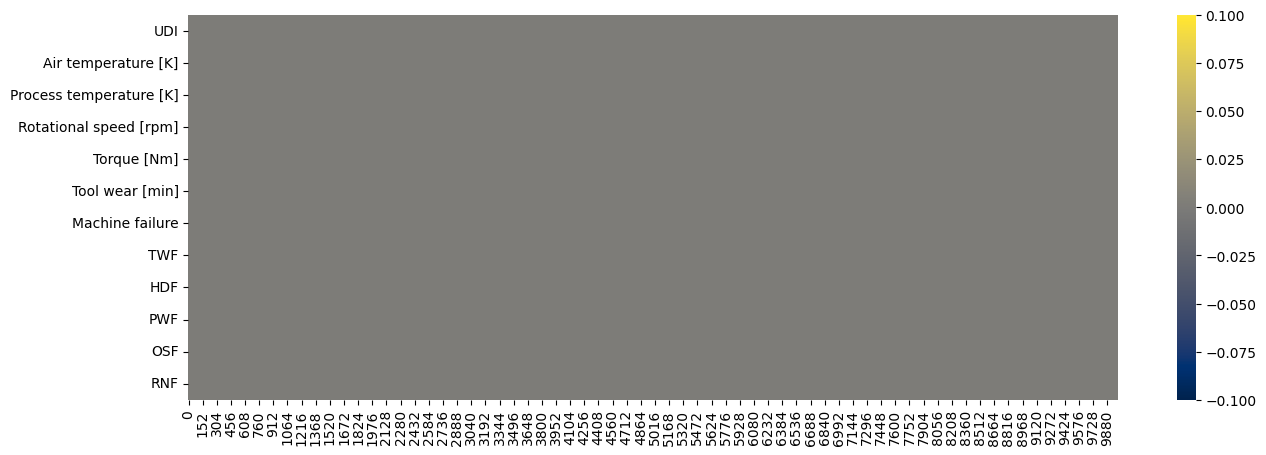

In [126]:
plt.figure(figsize=(15, 5))             # ------> Tamaño de la grafica
sns.heatmap(ndata.isna().transpose(),    # ------> isna() valores nulos (True /False), Transpose invierte los nombres de las columnas
            cmap='cividis',             # ------> Paleta de colores para daltónicos
            linewidths=0.0)             # ------> Control de lineas divisorias entre cada celda

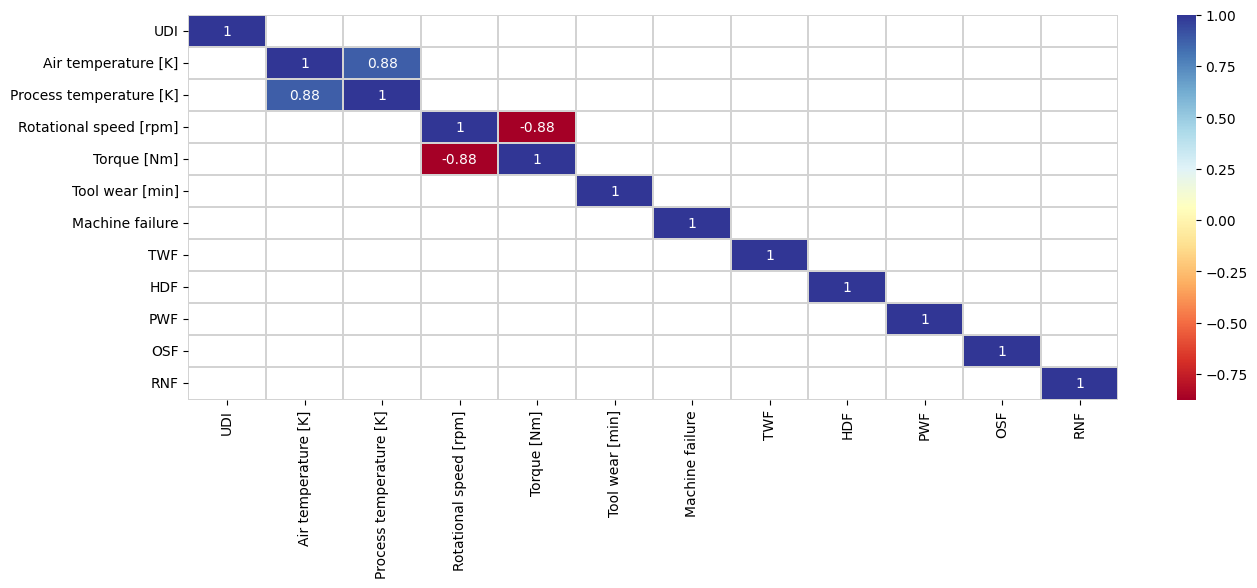

In [127]:
plt.figure(figsize=(15, 5))     # Tamaño del gráfico
threshold = 0.80                # Ubmbral necesario de correlacion necesaria
dcluster = ndata.corr()         # Calculamos la matriz de pearson
mask = dcluster.where((abs(dcluster) >= threshold)).isna()  # Lógica: Si la correlacion es mayor al umbral lo mostrá como dato
                                                            # de lo contrario se mostrado como False y no se visualizará
sns.heatmap(dcluster,
            cmap='RdYlBu',      # Paleta de colores frios
            annot=True,         # Anotaciones en los cuadros
            mask=mask,          # Llamamos al argumento mask
            linewidths=0.1,
            linecolor='lightgrey').set_facecolor('white')   # Fondo del grafico color blanco

In [ ]:
vdata = ndata.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1) # ----> Eliminamos los datos que no influyen ni mas 
                                                                        # ----> ni menos en el momento de si FALLA si / no

In [129]:
list(vdata)

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

In [130]:
output_data = '../data/clean/data_cls.csv'
vdata.to_csv(output_data, index=False)